In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!gdown https://drive.google.com/file/d/1NhJkTFpO71ZePLz6th9MsdUfMEvR9i26/view?usp=sharing --fuzzy

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Downloading...
From: https://drive.google.com/uc?id=1NhJkTFpO71ZePLz6th9MsdUfMEvR9i26
To: /content/NESTQUANT_DATA_AND_LABEL_BTC.csv
100% 6.97M/6.97M [00:00<00:00, 98.1MB/s]


In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime as dt
import warnings
from tqdm import tqdm_notebook
import time
from datetime import date
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import math
from pylab import rcParams
import plotly.express as px
warnings.filterwarnings("ignore")

In [ ]:
# Load data
df = pd.read_csv("/content/NESTQUANT_DATA_AND_LABEL_BTC.csv")
df

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_ASSET_VOLUME,NUMBER_OF_TRADES,TAKER_BUY_BASE_ASSET_VOLUME,TAKER_BUY_QUOTE_ASSET_VOLUME,YEAR_AND_MONTH,SYMBOL,LABEL
0,2017-09-16 17:00:00,3753.29,3753.29,3730.00,3730.00,12.426820,4.654148e+04,89,0.028936,1.086052e+02,201709,BTCUSDT,0.393885
1,2017-09-16 18:00:00,3490.00,3599.99,3490.00,3599.99,21.729145,7.725914e+04,68,18.714241,6.651942e+04,201709,BTCUSDT,0.390215
2,2017-09-16 19:00:00,3630.06,3667.99,3630.03,3630.04,3.842747,1.401746e+04,15,2.403627,8.793384e+03,201709,BTCUSDT,0.360434
3,2017-09-16 20:00:00,3610.00,3644.97,3610.00,3630.00,2.445122,8.883551e+03,39,1.233507,4.485416e+03,201709,BTCUSDT,0.398650
4,2017-09-16 21:00:00,3674.98,3727.90,3674.98,3690.00,5.444691,2.010018e+04,92,0.792797,2.950498e+03,201709,BTCUSDT,0.451718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47657,2023-03-01 02:00:00,23481.63,23492.84,23472.24,23473.37,634.810840,1.490652e+07,27420,298.291320,7.004613e+06,202302,BTCUSDT,0.448246
47658,2023-03-01 03:00:00,23263.38,23272.46,23167.15,23189.26,2865.914520,6.652689e+07,66824,1252.804130,2.908068e+07,202302,BTCUSDT,0.470401
47659,2023-03-01 04:00:00,23270.59,23277.98,23192.12,23209.65,1829.575030,4.252433e+07,57949,867.875200,2.017225e+07,202302,BTCUSDT,0.468764
47660,2023-03-01 05:00:00,23138.89,23173.84,23094.69,23164.41,1371.824500,3.173706e+07,40889,703.061520,1.626665e+07,202302,BTCUSDT,0.474988


In [ ]:
df['Date'] = pd.to_datetime(df['Date'],  errors='coerce')

In [ ]:
# check null
df.sort_values(by ='Date', ascending = True, inplace = True)
df

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_ASSET_VOLUME,NUMBER_OF_TRADES,TAKER_BUY_BASE_ASSET_VOLUME,TAKER_BUY_QUOTE_ASSET_VOLUME,YEAR_AND_MONTH,SYMBOL,LABEL
0,2017-09-16 17:00:00,3753.29,3753.29,3730.00,3730.00,12.426820,4.654148e+04,89,0.028936,1.086052e+02,201709,BTCUSDT,0.393885
1,2017-09-16 18:00:00,3490.00,3599.99,3490.00,3599.99,21.729145,7.725914e+04,68,18.714241,6.651942e+04,201709,BTCUSDT,0.390215
2,2017-09-16 19:00:00,3630.06,3667.99,3630.03,3630.04,3.842747,1.401746e+04,15,2.403627,8.793384e+03,201709,BTCUSDT,0.360434
3,2017-09-16 20:00:00,3610.00,3644.97,3610.00,3630.00,2.445122,8.883551e+03,39,1.233507,4.485416e+03,201709,BTCUSDT,0.398650
4,2017-09-16 21:00:00,3674.98,3727.90,3674.98,3690.00,5.444691,2.010018e+04,92,0.792797,2.950498e+03,201709,BTCUSDT,0.451718
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47657,2023-03-01 02:00:00,23481.63,23492.84,23472.24,23473.37,634.810840,1.490652e+07,27420,298.291320,7.004613e+06,202302,BTCUSDT,0.448246
47658,2023-03-01 03:00:00,23263.38,23272.46,23167.15,23189.26,2865.914520,6.652689e+07,66824,1252.804130,2.908068e+07,202302,BTCUSDT,0.470401
47659,2023-03-01 04:00:00,23270.59,23277.98,23192.12,23209.65,1829.575030,4.252433e+07,57949,867.875200,2.017225e+07,202302,BTCUSDT,0.468764
47660,2023-03-01 05:00:00,23138.89,23173.84,23094.69,23164.41,1371.824500,3.173706e+07,40889,703.061520,1.626665e+07,202302,BTCUSDT,0.474988


In [ ]:
#missing row
start_time = df['Date'].min()
end_time = df['Date'].max()
expected_times = pd.date_range(start=start_time, end=end_time, freq='5Min')
missing_times = expected_times[~expected_times.isin(df['Date'])]
missing_times

DatetimeIndex(['2017-09-16 17:05:00', '2017-09-16 17:10:00',
               '2017-09-16 17:15:00', '2017-09-16 17:20:00',
               '2017-09-16 17:25:00', '2017-09-16 17:30:00',
               '2017-09-16 17:35:00', '2017-09-16 17:40:00',
               '2017-09-16 17:45:00', '2017-09-16 17:50:00',
               ...
               '2023-03-01 05:10:00', '2023-03-01 05:15:00',
               '2023-03-01 05:20:00', '2023-03-01 05:25:00',
               '2023-03-01 05:30:00', '2023-03-01 05:35:00',
               '2023-03-01 05:40:00', '2023-03-01 05:45:00',
               '2023-03-01 05:50:00', '2023-03-01 05:55:00'],
              dtype='datetime64[ns]', length=525903, freq=None)

In [ ]:
df.describe()

,OPEN,HIGH,LOW,CLOSE,VOLUME,QUOTE_ASSET_VOLUME,NUMBER_OF_TRADES,TAKER_BUY_BASE_ASSET_VOLUME,TAKER_BUY_QUOTE_ASSET_VOLUME,YEAR_AND_MONTH,LABEL
count,47662.000000,47662.000000,47662.000000,47662.000000,47662.000000,4.766200e+04,47662.000000,47662.000000,4.766200e+04,47662.000000,47662.000000
mean,19730.399413,19767.316636,19693.611161,19730.631662,303.248049,6.552645e+06,5549.184843,150.877031,3.247957e+06,201999.724728,0.420557
std,16514.973182,16546.984684,16483.461063,16514.972667,458.457598,1.104035e+07,8761.041848,230.432522,5.544114e+06,159.865934,0.074462
min,3172.620000,3183.010000,3164.000000,3178.730000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,201709.000000,0.000000
25%,7505.190000,7518.457500,7493.367500,7508.065000,81.319403,7.297580e+05,860.000000,40.019013,3.646578e+05,201901.000000,0.385336
50%,11041.905000,11067.880000,11005.985000,11040.470000,156.536804,2.350477e+06,2481.000000,77.315463,1.135200e+06,202006.000000,0.416168
75%,30515.135000,30567.287500,30456.987500,30494.335000,335.133344,8.281387e+06,6093.750000,166.750674,4.051136e+06,202110.000000,0.451782
max,68635.120000,68700.000000,68505.000000,68655.170000,13552.209540,2.953383e+08,186346.000000,6857.671770,1.562014e+08,202302.000000,1.000000


In [ ]:
# common config
test_size = 0.2                # proportion of dataset to be used as test set
cv_size = 0.2                  # proportion of dataset to be used as cross-validation set
N = 3                         # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

n_estimators = 100             # Number of boosted trees to fit. default = 100
max_depth = 3                  # Maximum tree depth for base learners. default = 3
learning_rate = 0.1            # Boosting learning rate (xgb’s “eta”). default = 0.1
min_child_weight = 1           # Minimum sum of instance weight(hessian) needed in a child. default = 1
subsample = 1                  # Subsample ratio of the training instance. default = 1
colsample_bytree = 1           # Subsample ratio of columns when constructing each tree. default = 1
colsample_bylevel = 1          # Subsample ratio of columns for each split, in each level. default = 1
gamma = 0                      # Minimum loss reduction required to make a further partition on a leaf node of the tree. default=0

model_seed = 100

fontsize = 14
ticklabelsize = 14

In [ ]:
# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]

# Get month of each sample
df['month'] = df['date'].dt.month

df.head()

,date,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,year_and_month,symbol,label,month
0,2017-09-16 17:00:00,3753.29,3753.29,3730.00,3730.00,12.426820,46541.481835,89,0.028936,108.605199,201709,BTCUSDT,0.393885,9
1,2017-09-16 18:00:00,3490.00,3599.99,3490.00,3599.99,21.729145,77259.137862,68,18.714241,66519.419009,201709,BTCUSDT,0.390215,9
2,2017-09-16 19:00:00,3630.06,3667.99,3630.03,3630.04,3.842747,14017.455355,15,2.403627,8793.384171,201709,BTCUSDT,0.360434,9
3,2017-09-16 20:00:00,3610.00,3644.97,3610.00,3630.00,2.445122,8883.551202,39,1.233507,4485.416392,201709,BTCUSDT,0.398650,9
4,2017-09-16 21:00:00,3674.98,3727.90,3674.98,3690.00,5.444691,20100.181887,92,0.792797,2950.497847,201709,BTCUSDT,0.451718,9


Text(0, 0.5, 'USD')

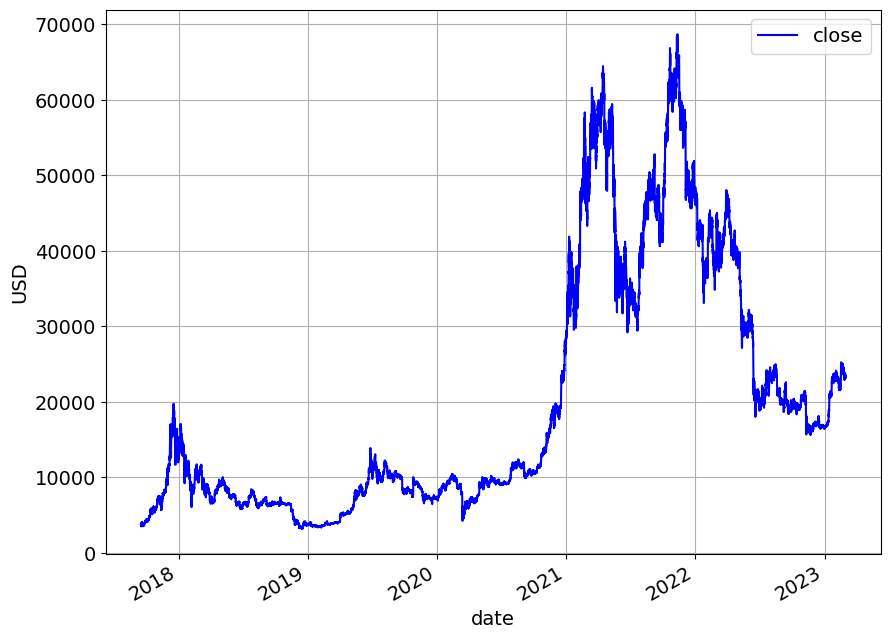

In [ ]:
# Plot close over time
rcParams['figure.figsize'] = 10, 8

ax = df.plot(x='date', y='close', style='b-', grid=True)
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [ ]:
df['range_hl'] = df['high'] - df['low']
df['range_oc'] = df['open'] - df['close']
df.drop(['high', 'low', 'open', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'year_and_month', 'symbol', 'label'], axis=1, inplace=True)
df.head()

,date,close,volume,month,range_hl,range_oc
0,2017-09-16 17:00:00,3730.00,12.426820,9,23.29,23.29
1,2017-09-16 18:00:00,3599.99,21.729145,9,109.99,-109.99
2,2017-09-16 19:00:00,3630.04,3.842747,9,37.96,0.02
3,2017-09-16 20:00:00,3630.00,2.445122,9,34.97,-20.00
4,2017-09-16 21:00:00,3690.00,5.444691,9,52.92,-15.02


In [ ]:
df['order_day'] = [x for x in list(range(len(df)))]

# merging_keys
merging_keys = ['order_day']

# List of columns that we will use to create lags
lag_cols = ['close', 'range_hl', 'range_oc', 'volume']
lag_cols

['close', 'range_hl', 'range_oc', 'volume']

In [ ]:
shift_range = [x+1 for x in range(N)]

for shift in tqdm_notebook(shift_range):
    train_shift = df[merging_keys + lag_cols].copy()

    train_shift['order_day'] = train_shift['order_day'] + shift

    foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
    train_shift = train_shift.rename(columns=foo)

    df = pd.merge(df, train_shift, on=merging_keys, how='left') #.fillna(0)

del train_shift

# Remove NaNs
df = df[N:]

df.head()

  0%|          | 0/3 [00:00<?, ?it/s]

,date,close,volume,month,range_hl,range_oc,order_day,close_lag_1,range_hl_lag_1,range_oc_lag_1,volume_lag_1,close_lag_2,range_hl_lag_2,range_oc_lag_2,volume_lag_2,close_lag_3,range_hl_lag_3,range_oc_lag_3,volume_lag_3
3,2017-09-16 20:00:00,3630.0,2.445122,9,34.97,-20.00,3,3630.04,37.96,0.02,3.842747,3599.99,109.99,-109.99,21.729145,3730.00,23.29,23.29,12.426820
4,2017-09-16 21:00:00,3690.0,5.444691,9,52.92,-15.02,4,3630.00,34.97,-20.00,2.445122,3630.04,37.96,0.02,3.842747,3599.99,109.99,-109.99,21.729145
5,2017-09-16 22:00:00,3650.0,1.857779,9,10.01,-10.01,5,3690.00,52.92,-15.02,5.444691,3630.00,34.97,-20.00,2.445122,3630.04,37.96,0.02,3.842747
6,2017-09-16 23:00:00,3599.0,2.246898,9,31.97,-31.97,6,3650.00,10.01,-10.01,1.857779,3690.00,52.92,-15.02,5.444691,3630.00,34.97,-20.00,2.445122
7,2017-09-17 00:00:00,3640.4,3.225976,9,58.24,-49.64,7,3599.00,31.97,-31.97,2.246898,3650.00,10.01,-10.01,1.857779,3690.00,52.92,-15.02,5.444691


In [ ]:
def get_mov_avg_std(df, col, N):
    mean_list = df[col].rolling(window = N, min_periods=1).mean()
    std_list = df[col].rolling(window = N, min_periods=1).std()


    mean_list = np.concatenate((np.array([np.nan]), np.array(mean_list[:-1])))
    std_list = np.concatenate((np.array([np.nan]), np.array(std_list[:-1])))

    df_out = df.copy()
    df_out[col + '_mean'] = mean_list
    df_out[col + '_std'] = std_list

    return df_out

cols_list = [
"close",
"range_hl",
"range_oc",
"volume"
]

for col in cols_list:
    df = get_mov_avg_std(df, col, N)
df.head()

,date,close,volume,month,range_hl,range_oc,order_day,close_lag_1,range_hl_lag_1,range_oc_lag_1,...,range_oc_lag_3,volume_lag_3,close_mean,close_std,range_hl_mean,range_hl_std,range_oc_mean,range_oc_std,volume_mean,volume_std
3,2017-09-16 20:00:00,3630.0,2.445122,9,34.97,-20.00,3,3630.04,37.96,0.02,...,23.29,12.426820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-09-16 21:00:00,3690.0,5.444691,9,52.92,-15.02,4,3630.00,34.97,-20.00,...,-109.99,21.729145,3630.000000,NaN,34.970000,NaN,-20.00,NaN,2.445122,NaN
5,2017-09-16 22:00:00,3650.0,1.857779,9,10.01,-10.01,5,3690.00,52.92,-15.02,...,0.02,3.842747,3660.000000,42.426407,43.945000,12.692567,-17.51,3.521392,3.944907,2.121016
6,2017-09-16 23:00:00,3599.0,2.246898,9,31.97,-31.97,6,3650.00,10.01,-10.01,...,-20.00,2.445122,3656.666667,30.550505,32.633333,21.550221,-15.01,4.995008,3.249197,1.923899
7,2017-09-17 00:00:00,3640.4,3.225976,9,58.24,-49.64,7,3599.00,31.97,-31.97,...,-15.02,5.444691,3646.333333,45.610671,31.633333,21.456981,-19.00,11.508288,3.183123,1.968215


In [ ]:
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

# Split into train, cv, and test
train = df[:num_train]
cv = df[num_train:num_train+num_cv]
train_cv = df[:num_train+num_cv]
test = df[num_train+num_cv:]
print("train.shape = " + str(train.shape))
print("cv.shape = " + str(cv.shape))
print("train_cv.shape = " + str(train_cv.shape))
print("test.shape = " + str(test.shape))

num_train = 28597
num_cv = 9531
num_test = 9531
train.shape = (28597, 27)
cv.shape = (9531, 27)
train_cv.shape = (38128, 27)
test.shape = (9531, 27)


In [ ]:
cols_to_scale = [
"close"
]

for i in range(1,N+1):
    cols_to_scale.append("close_lag_"+str(i))
    cols_to_scale.append("range_hl_lag_"+str(i))
    cols_to_scale.append("range_oc_lag_"+str(i))
    cols_to_scale.append("volume_lag_"+str(i))

# Do scaling for train set
# Here we only scale the train dataset, and not the entire dataset to prevent information leak
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train[cols_to_scale])
print("scaler.mean_ = " + str(scaler.mean_))
print("scaler.var_ = " + str(scaler.var_))
print("train_scaled.shape = " + str(train_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_scaled = pd.DataFrame(train_scaled, columns=cols_to_scale)
train_scaled[['date', 'month']] = train.reset_index()[['date', 'month']]
print("train_scaled.shape = " + str(train_scaled.shape))
train_scaled.head()

scaler.mean_ = [ 8.55217474e+03  8.55144145e+03  3.28395220e+01 -3.07631919e-01
  1.86585429e+02  8.55070537e+03  3.28404070e+01 -3.09186978e-01
  1.86578849e+02  8.54998208e+03  3.28394335e+01 -3.08573277e-01
  1.86575807e+02]
scaler.var_ = [1.20378782e+07 1.20297192e+07 1.81156391e+03 1.11574522e+03
 7.23282743e+04 1.20215139e+07 1.81167807e+03 1.11601718e+03
 7.23292056e+04 1.20135266e+07 1.81166956e+03 1.11603538e+03
 7.23300005e+04]
train_scaled.shape = (28597, 13)
train_scaled.shape = (28597, 15)


,close,close_lag_1,range_hl_lag_1,range_oc_lag_1,volume_lag_1,close_lag_2,range_hl_lag_2,range_oc_lag_2,volume_lag_2,close_lag_3,range_hl_lag_3,range_oc_lag_3,volume_lag_3,date,month
0,-1.418672,-1.418930,0.120305,0.009809,-0.679494,-1.427869,1.812563,-3.283184,-0.612959,-1.390625,-0.224356,0.706394,-0.647533,2017-09-16 20:00:00,9
1,-1.401379,-1.418942,0.050055,-0.589543,-0.684691,-1.419202,0.120280,0.009854,-0.679466,-1.428135,1.812590,-3.283176,-0.612944,2017-09-16 21:00:00,9
2,-1.412908,-1.401643,0.471788,-0.440453,-0.673538,-1.419214,0.050033,-0.589425,-0.684662,-1.419465,0.120304,0.009835,-0.679451,2017-09-16 22:00:00,9
3,-1.427607,-1.413175,-0.536377,-0.290466,-0.686875,-1.401909,0.471753,-0.440353,-0.673509,-1.419477,0.050056,-0.589438,-0.684647,2017-09-16 23:00:00,9
4,-1.415675,-1.427880,-0.020429,-0.947896,-0.685428,-1.413445,-0.536381,-0.290384,-0.686846,-1.402166,0.471777,-0.440368,-0.673494,2017-09-17 00:00:00,9


In [ ]:
# Do scaling for train+dev set
scaler_train_cv = StandardScaler()
train_cv_scaled = scaler_train_cv.fit_transform(train_cv[cols_to_scale])
print("scaler_train_cv.mean_ = " + str(scaler_train_cv.mean_))
print("scaler_train_cv.var_ = " + str(scaler_train_cv.var_))
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))

# Convert the numpy array back into pandas dataframe
train_cv_scaled = pd.DataFrame(train_cv_scaled, columns=cols_to_scale)
train_cv_scaled[['date', 'month']] = train_cv.reset_index()[['date', 'month']]
print("train_cv_scaled.shape = " + str(train_cv_scaled.shape))
train_cv_scaled.head()

scaler_train_cv.mean_ = [ 1.80810642e+04  1.80802092e+04  7.48338730e+01 -4.50705781e-01
  2.12143051e+02  1.80793527e+04  7.48335294e+01 -4.52462495e-01
  2.12140172e+02  1.80785019e+04  7.48287424e+01 -4.54901385e-01
  2.12137209e+02]
scaler_train_cv.var_ = [3.05751658e+08 3.05748496e+08 1.29213785e+04 6.30478655e+03
 7.98901420e+04 3.05745327e+08 1.29213498e+04 6.30505375e+03
 7.98909223e+04 3.05742148e+08 1.29209696e+04 6.30471114e+03
 7.98917711e+04]
train_cv_scaled.shape = (38128, 13)
train_cv_scaled.shape = (38128, 15)


,close,close_lag_1,range_hl_lag_1,range_oc_lag_1,volume_lag_1,close_lag_2,range_hl_lag_2,range_oc_lag_2,volume_lag_2,close_lag_3,range_hl_lag_3,range_oc_lag_3,volume_lag_3,date,month
0,-0.826448,-0.826401,-0.324388,0.005928,-0.736959,-0.828075,0.309280,-1.379490,-0.673664,-0.820595,-0.453405,0.299046,-0.706561,2017-09-16 20:00:00,9
1,-0.823016,-0.826403,-0.350691,-0.246204,-0.741904,-0.826356,-0.324385,0.005950,-0.736945,-0.828030,0.309326,-1.379497,-0.673650,2017-09-16 21:00:00,9
2,-0.825304,-0.822972,-0.192781,-0.183486,-0.731291,-0.826358,-0.350689,-0.246177,-0.741890,-0.826312,-0.324348,0.005981,-0.736931,2017-09-16 22:00:00,9
3,-0.828221,-0.825259,-0.570270,-0.120390,-0.743982,-0.822927,-0.192778,-0.183460,-0.731278,-0.826314,-0.350652,-0.246153,-0.741875,2017-09-16 23:00:00,9
4,-0.825853,-0.828176,-0.377083,-0.396955,-0.742605,-0.825215,-0.570268,-0.120365,-0.743968,-0.822883,-0.192739,-0.183434,-0.731263,2017-09-17 00:00:00,9


In [ ]:
def scale_row(row, feat_mean, feat_std):

    feat_std = 0.001 if feat_std == 0 else feat_std

    row_scaled = (row-feat_mean) / feat_std

    return row_scaled

# Do scaling for dev set
cv_scaled = cv[['date']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = cv.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    cv_scaled = pd.concat([cv_scaled, temp], axis=1)

# Now the entire dev set is scaled
cv_scaled.head()

  0%|          | 0/4 [00:00<?, ?it/s]

,date,close_lag_1,close_lag_2,close_lag_3,range_hl_lag_1,range_hl_lag_2,range_hl_lag_3,range_oc_lag_1,range_oc_lag_2,range_oc_lag_3,volume_lag_1,volume_lag_2,volume_lag_3
28600,2020-12-26 08:00:00,0.366504,0.765039,-1.131543,1.136703,-0.392484,-0.744220,1.059438,-0.927455,-0.131983,1.129692,-0.357851,-0.771841
28601,2020-12-26 09:00:00,-0.785056,-0.340797,1.125853,-0.802006,1.120440,-0.318435,-0.055407,1.026552,-0.971144,-0.713737,1.142957,-0.429219
28602,2020-12-26 10:00:00,1.153672,-0.619043,-0.534628,-0.265476,-0.840474,1.105950,-0.647107,-0.504661,1.151768,-0.051963,-0.973005,1.024969
28603,2020-12-26 11:00:00,0.343832,0.782723,-1.126554,-0.389313,1.136106,-0.746792,-0.197297,-0.886646,1.083943,-0.561558,1.154558,-0.593000
28604,2020-12-26 12:00:00,-0.529842,-0.623589,1.153431,0.837742,-1.107087,0.269345,1.153940,-0.540680,-0.613260,0.589271,-1.154618,0.565347


In [ ]:
test_scaled = test[['date']]
for col in tqdm_notebook(cols_list):
    feat_list = [col + '_lag_' + str(shift) for shift in range(1, N+1)]
    temp = test.apply(lambda row: scale_row(row[feat_list], row[col+'_mean'], row[col+'_std']), axis=1)
    test_scaled = pd.concat([test_scaled, temp], axis=1)


test_scaled.head()

  0%|          | 0/4 [00:00<?, ?it/s]

,date,close_lag_1,close_lag_2,close_lag_3,range_hl_lag_1,range_hl_lag_2,range_hl_lag_3,range_oc_lag_1,range_oc_lag_2,range_oc_lag_3,volume_lag_1,volume_lag_2,volume_lag_3
38131,2022-01-28 04:00:00,0.250601,0.850865,-1.101466,-0.478274,-0.671050,1.149324,-0.443761,-0.701324,1.145085,1.150686,-0.492029,-0.658657
38132,2022-01-28 05:00:00,-1.153674,0.534670,0.619004,1.145211,-0.444668,-0.700544,-1.056465,0.931855,0.124611,0.984727,0.029877,-1.014603
38133,2022-01-28 06:00:00,0.454761,-1.146562,0.691801,-0.798310,1.121669,-0.323359,0.989512,-1.010168,0.020655,-0.382979,1.134885,-0.751906
38134,2022-01-28 07:00:00,1.036947,-0.078524,-0.958423,0.519879,-1.152853,0.632974,-0.629077,1.153107,-0.524029,-0.974656,-0.048893,1.023550
38135,2022-01-28 08:00:00,0.957997,0.079286,-1.037283,1.040881,-0.087514,-0.953367,-0.814210,-0.301977,1.116187,1.126569,-0.782675,-0.343894


In [ ]:
features = []
for i in range(1,N+1):
    features.append("close_lag_"+str(i))
    features.append("range_hl_lag_"+str(i))
    features.append("range_oc_lag_"+str(i))
    features.append("volume_lag_"+str(i))

target = "close"


# Split into X and y
X_train = train[features]
y_train = train[target]
X_cv = cv[features]
y_cv = cv[target]
X_train_cv = train_cv[features]
y_train_cv = train_cv[target]
X_sample = test[features]
y_sample = test[target]
print("X_train.shape = " + str(X_train.shape))
print("y_train.shape = " + str(y_train.shape))
print("X_cv.shape = " + str(X_cv.shape))

print("y_cv.shape = " + str(y_cv.shape))
print("X_train_cv.shape = " + str(X_train_cv.shape))
print("y_train_cv.shape = " + str(y_train_cv.shape))
print("X_sample.shape = " + str(X_sample.shape))
print("y_sample.shape = " + str(y_sample.shape))

X_train.shape = (28597, 12)
y_train.shape = (28597,)
X_cv.shape = (9531, 12)
y_cv.shape = (9531,)
X_train_cv.shape = (38128, 12)
y_train_cv.shape = (38128,)
X_sample.shape = (9531, 12)
y_sample.shape = (9531,)


In [ ]:
# Split into X and y
X_train_scaled = train_scaled[features]
y_train_scaled = train_scaled[target]
X_cv_scaled = cv_scaled[features]
X_train_cv_scaled = train_cv_scaled[features]
y_train_cv_scaled = train_cv_scaled[target]
X_sample_scaled = test_scaled[features]
print("X_train_scaled.shape = " + str(X_train_scaled.shape))
print("y_train_scaled.shape = " + str(y_train_scaled.shape))
print("X_cv_scaled.shape = " + str(X_cv_scaled.shape))
print("X_train_cv_scaled.shape = " + str(X_train_cv_scaled.shape))
print("y_train_cv_scaled.shape = " + str(y_train_cv_scaled.shape))
print("X_sample_scaled.shape = " + str(X_sample_scaled.shape))

X_train_scaled.shape = (28597, 12)
y_train_scaled.shape = (28597,)
X_cv_scaled.shape = (9531, 12)
X_train_cv_scaled.shape = (38128, 12)
y_train_cv_scaled.shape = (38128,)
X_sample_scaled.shape = (9531, 12)


Text(0.5, 1.0, 'Without scaling')

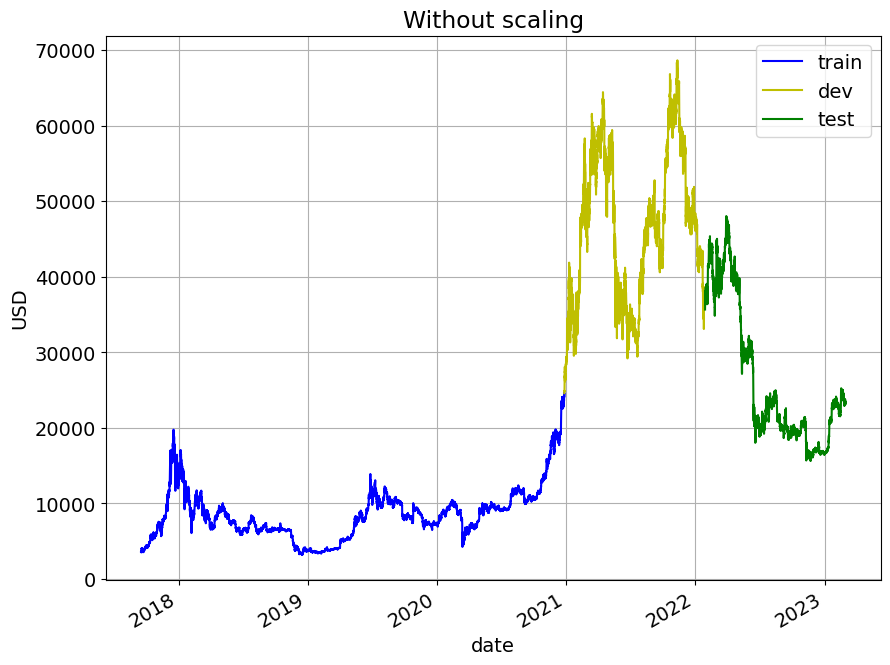

In [ ]:
# Plot close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train.plot(x='date', y='close', style='b-', grid=True)
ax = cv.plot(x='date', y='close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='close', style='g-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_title("Without scaling")

Text(0.5, 1.0, 'With scaling')

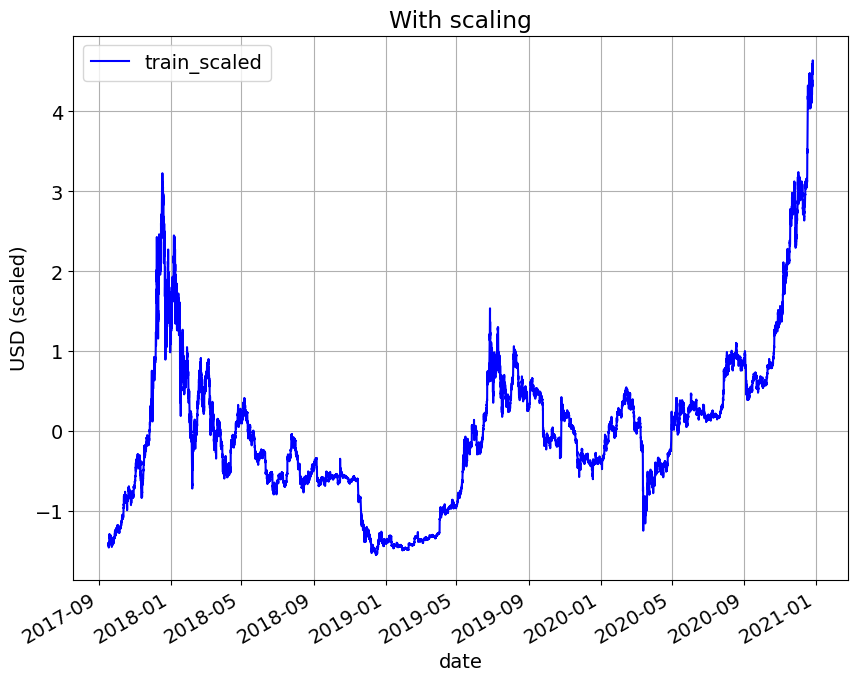

In [ ]:
# Plot close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

ax = train_scaled.plot(x='date', y='close', style='b-', grid=True)
ax.legend(['train_scaled'])
ax.set_xlabel("date")
ax.set_ylabel("USD (scaled)")
ax.set_title("With scaling")

In [ ]:
# Create the model
model = XGBRegressor(seed=model_seed,
                     n_estimators=n_estimators,
                     max_depth=max_depth,
                     learning_rate=learning_rate,
                     min_child_weight=min_child_weight,
                     subsample=subsample,
                     colsample_bytree=colsample_bytree,
                     colsample_bylevel=colsample_bylevel,
                     gamma=gamma)

# Train the regressor
model.fit(X_train_scaled, y_train_scaled)

XGBRegressor(base_score=None, booster=None, callbacks=None, colsample_bylevel=1,
             colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
def get_mape(y_true, y_pred):

    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Do prediction on train set
est_scaled = model.predict(X_train_scaled)
est = est_scaled * math.sqrt(scaler.var_[0]) + scaler.mean_[0]

# Calculate RMSE
print("RMSE on train set = %0.3f" % math.sqrt(mean_squared_error(y_train, est)))

# Calculate MAPE
print("MAPE on train set = %0.3f%%" % get_mape(y_train, est))

RMSE on train set = 90.941
MAPE on train set = 0.601%


In [ ]:
# Do prediction on cv set
est_scaled = model.predict(X_cv_scaled)
cv['est_scaled'] = est_scaled
cv['est'] = cv['est_scaled'] * cv['close_std'] + cv['close_mean']

# Calculate RMSE
rmse_bef_tuning = math.sqrt(mean_squared_error(y_cv, cv['est']))
print("RMSE on dev set = %0.3f" % rmse_bef_tuning)

# Calculate MAPE
mape_bef_tuning = get_mape(y_cv, cv['est'])
print("MAPE on dev set = %0.3f%%" % mape_bef_tuning)

RMSE on dev set = 411.538
MAPE on dev set = 0.617%


Text(0, 0.5, 'USD')

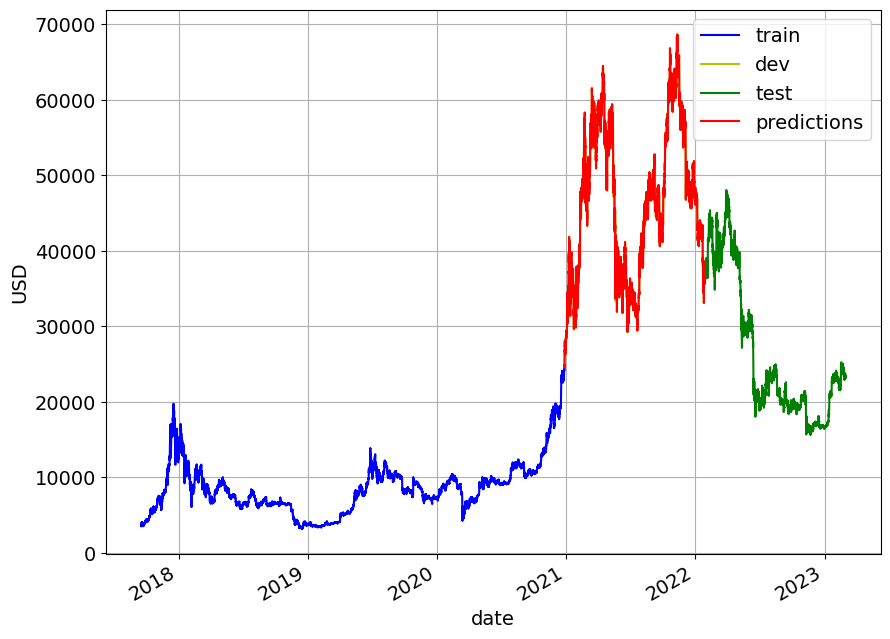

In [ ]:
# Plot close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': cv['est'],
                       'y_cv': y_cv,
                       'date': cv['date']})

ax = train.plot(x='date', y='close', style='b-', grid=True)
ax = cv.plot(x='date', y='close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='close', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

In [ ]:
# View a list of the features and their importance scores
imp = list(zip(train[features], model.feature_importances_))
imp.sort(key=lambda tup: tup[1])
imp[-10:]

[('range_hl_lag_2', 6.241307e-05),
 ('volume_lag_2', 6.976185e-05),
 ('range_hl_lag_1', 7.0944705e-05),
 ('range_oc_lag_3', 7.120551e-05),
 ('range_hl_lag_3', 7.325762e-05),
 ('volume_lag_3', 8.226831e-05),
 ('volume_lag_1', 9.461749e-05),
 ('close_lag_2', 0.02663651),
 ('close_lag_3', 0.031810142),
 ('close_lag_1', 0.94091475)]

# tuning nestimator and max_depth

In [ ]:
def train_pred_eval_model(X_train_scaled,
                          y_train_scaled,
                          X_test_scaled,
                          y_test,
                          col_mean,
                          col_std,
                          seed=100,
                          n_estimators=100,
                          max_depth=3,
                          learning_rate=0.1,
                          min_child_weight=1,
                          subsample=1,
                          colsample_bytree=1,
                          colsample_bylevel=1,
                          gamma=0):


    model = XGBRegressor(seed=model_seed,
                         n_estimators=n_estimators,
                         max_depth=max_depth,
                         learning_rate=learning_rate,
                         min_child_weight=min_child_weight,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         colsample_bylevel=colsample_bylevel,
                         gamma=gamma)

    # Train the model
    model.fit(X_train_scaled, y_train_scaled)

    # Get predicted labels and scale back to original range
    est_scaled = model.predict(X_test_scaled)
    est = est_scaled * col_std + col_mean

    # Calculate RMSE
    rmse = math.sqrt(mean_squared_error(y_test, est))
    mape = get_mape(y_test, est)

    return rmse, mape, est

In [ ]:
param_label = 'n_estimators'
param_list = range(10, 310, 10)

param2_label = 'max_depth'
param2_list = [2, 3, 4, 5, 6, 7, 8, 9]

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):

    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled,
                                     y_train_scaled,
                                     X_cv_scaled,
                                     y_cv,
                                     cv['close_mean'],
                                     cv['close_std'],
                                     seed=model_seed,
                                     n_estimators=param,
                                     max_depth=param2,
                                     learning_rate=learning_rate,
                                     min_child_weight=min_child_weight,
                                     subsample=subsample,
                                     colsample_bytree=colsample_bytree,
                                     colsample_bylevel=colsample_bylevel,
                                     gamma=gamma)

        # results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)

error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate

  0%|          | 0/30 [00:00<?, ?it/s]

Minutes taken = 38.64051560163498


,n_estimators,max_depth,rmse,mape_pct
0,10,2,427.514139,0.639401
1,10,3,425.570677,0.635965
2,10,4,424.822315,0.634880
3,10,5,425.066888,0.635087
4,10,6,425.136325,0.635163
...,...,...,...,...
235,300,5,411.497433,0.616341
236,300,6,411.668220,0.616446
237,300,7,411.074233,0.616215
238,300,8,411.215974,0.616641


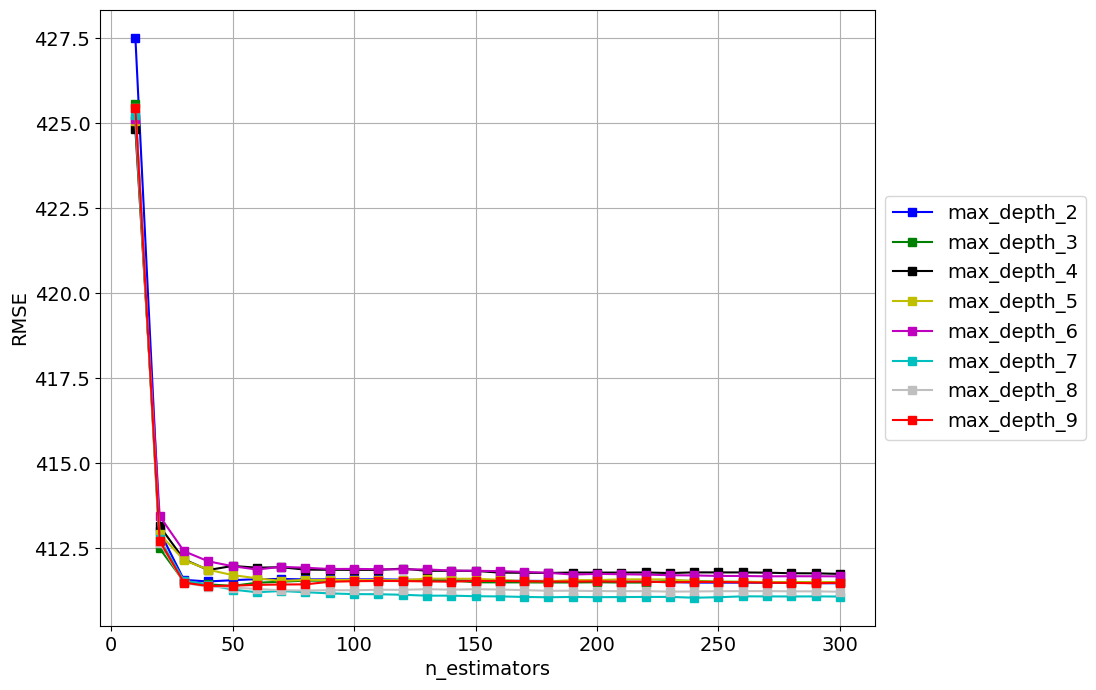

In [ ]:
# Plot performance versus params
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
plt.rcParams.update({'font.size': 14})
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [ ]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
n_estimators_opt = temp['n_estimators'].values[0]
max_depth_opt = temp['max_depth'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = ")
n_estimators_opt, max_depth_opt

min RMSE = 411.039
optimum params = 


(240, 7)

In [ ]:
# Get optimum value for param and param2, using MAPE
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum params = ")
temp['n_estimators'].values[0], temp['max_depth'].values[0]

min MAPE = 0.616%
optimum params = 


(150, 7)

# tuning learning rate and min_child_weight

In [ ]:
param_label = 'learning_rate'
param_list = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3]

param2_label = 'min_child_weight'
param2_list = range(5, 21, 1)

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
#     print("param = " + str(param))

    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled,
                                     y_train_scaled,
                                     X_cv_scaled,
                                     y_cv,
                                     cv['close_mean'],
                                     cv['close_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt,
                                     max_depth=max_depth_opt,
                                     learning_rate=param,
                                     min_child_weight=param2,
                                     subsample=subsample,
                                     colsample_bytree=colsample_bytree,
                                     colsample_bylevel=colsample_bylevel,
                                     gamma=gamma)

        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)

error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate

  0%|          | 0/7 [00:00<?, ?it/s]

Minutes taken = 33.62510710954666


,learning_rate,min_child_weight,rmse,mape_pct
0,0.001,5,487.004112,0.730513
1,0.001,6,487.004112,0.730513
2,0.001,7,487.004112,0.730513
3,0.001,8,487.004112,0.730513
4,0.001,9,487.004112,0.730513
...,...,...,...,...
107,0.300,16,411.591003,0.617030
108,0.300,17,411.331998,0.616859
109,0.300,18,411.365012,0.616847
110,0.300,19,411.320861,0.616686


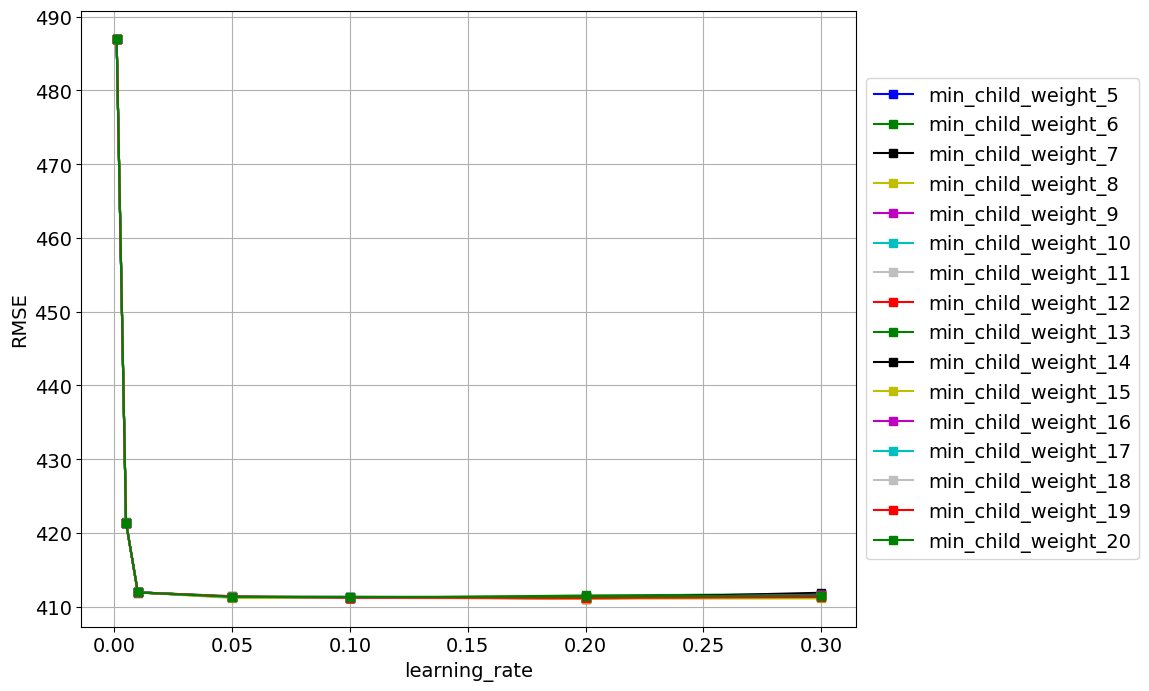

In [ ]:
# Plot performance versus params
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
plt.rcParams.update({'font.size': 14})
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [ ]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
learning_rate_opt = temp['learning_rate'].values[0]
min_child_weight_opt = temp['min_child_weight'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = ")
learning_rate_opt, min_child_weight_opt

min RMSE = 411.084
optimum params = 


(0.2, 5)

In [ ]:
# Get optimum value for param and param2, using MAPE
# We will use RMSE to decide the final optimum params to use
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum params = ")
temp['learning_rate'].values[0], temp['min_child_weight'].values[0]

min MAPE = 0.616%
optimum params = 


(0.2, 5)

# Tuning subsample and gamma

In [ ]:
param_label = 'subsample'
param_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

param2_label = 'gamma'
param2_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
#     print("param = " + str(param))

    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled,
                                     y_train_scaled,
                                     X_cv_scaled,
                                     y_cv,
                                     cv['close_mean'],
                                     cv['close_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt,
                                     max_depth=max_depth_opt,
                                     learning_rate=learning_rate_opt,
                                     min_child_weight=min_child_weight_opt,
                                     subsample=param,
                                     colsample_bytree=colsample_bytree,
                                     colsample_bylevel=colsample_bylevel,
                                     gamma=param2)

        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)

error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate

  0%|          | 0/10 [00:00<?, ?it/s]

Minutes taken = 22.426011832555137


,subsample,gamma,rmse,mape_pct
0,0.1,0.1,412.377378,0.617753
1,0.1,0.2,411.691381,0.616761
2,0.1,0.3,412.318108,0.617384
3,0.1,0.4,412.030051,0.616795
4,0.1,0.5,411.852979,0.616915
...,...,...,...,...
95,1.0,0.6,411.609111,0.616712
96,1.0,0.7,411.624321,0.616376
97,1.0,0.8,411.462997,0.616432
98,1.0,0.9,411.724190,0.616697


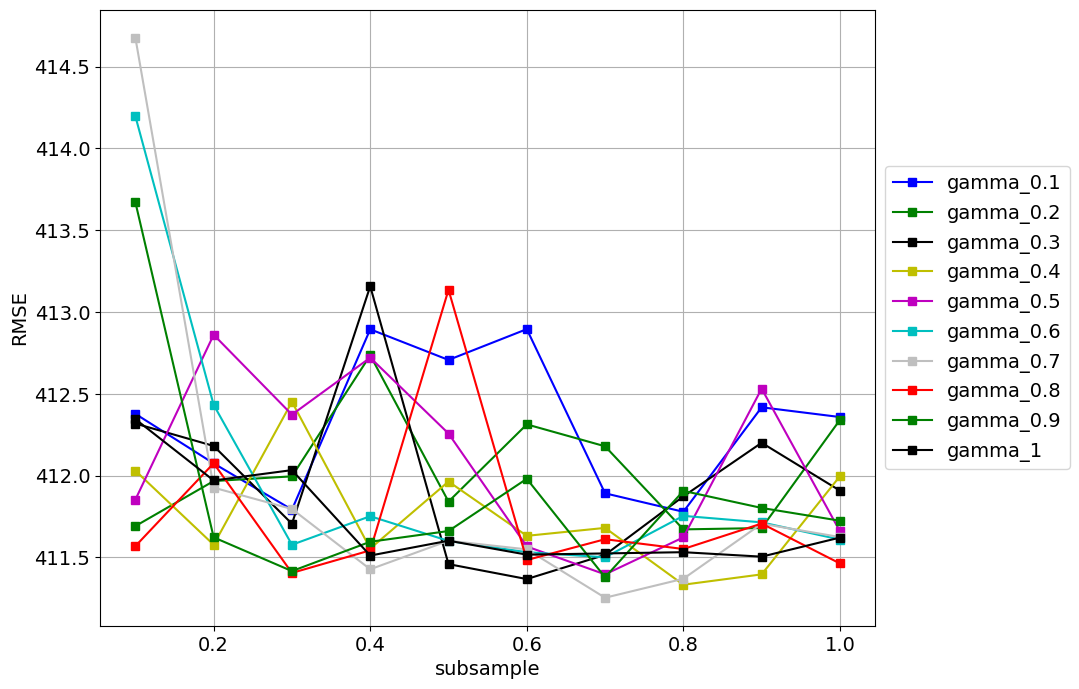

In [ ]:
# Plot performance versus params
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
plt.rcParams.update({'font.size': 14})
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [ ]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
subsample_opt = temp['subsample'].values[0]
gamma_opt = temp['gamma'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = ")
subsample_opt, gamma_opt

min RMSE = 411.254
optimum params = 


(0.7, 0.7)

# tuning colsample_bytree and colsample_bylevel

In [ ]:
param_label = 'colsample_bytree'
param_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

param2_label = 'colsample_bylevel'
param2_list = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

error_rate = {param_label: [] , param2_label: [], 'rmse': [], 'mape_pct': []}
tic = time.time()
for param in tqdm_notebook(param_list):
#     print("param = " + str(param))

    for param2 in param2_list:
        # Train, predict and eval model
        rmse, mape, _ = train_pred_eval_model(X_train_scaled,
                                     y_train_scaled,
                                     X_cv_scaled,
                                     y_cv,
                                     cv['close_mean'],
                                     cv['close_std'],
                                     seed=model_seed,
                                     n_estimators=n_estimators_opt,
                                     max_depth=max_depth_opt,
                                     learning_rate=learning_rate_opt,
                                     min_child_weight=min_child_weight_opt,
                                     subsample=subsample_opt,
                                     colsample_bytree=param,
                                     colsample_bylevel=param2,
                                     gamma=gamma_opt)

        # Collect results
        error_rate[param_label].append(param)
        error_rate[param2_label].append(param2)
        error_rate['rmse'].append(rmse)
        error_rate['mape_pct'].append(mape)

error_rate = pd.DataFrame(error_rate)
toc = time.time()
print("Minutes taken = " + str((toc-tic)/60.0))
error_rate

  0%|          | 0/6 [00:00<?, ?it/s]

Minutes taken = 5.991220351060232


,colsample_bytree,colsample_bylevel,rmse,mape_pct
0,0.5,0.5,517.214154,0.788324
1,0.5,0.6,517.214154,0.788324
2,0.5,0.7,489.717632,0.741795
3,0.5,0.8,489.717632,0.741795
4,0.5,0.9,490.467956,0.742714
5,0.5,1.0,461.664367,0.696725
6,0.6,0.5,483.137038,0.729847
7,0.6,0.6,491.262406,0.745589
8,0.6,0.7,491.262406,0.745589
9,0.6,0.8,498.195782,0.756736


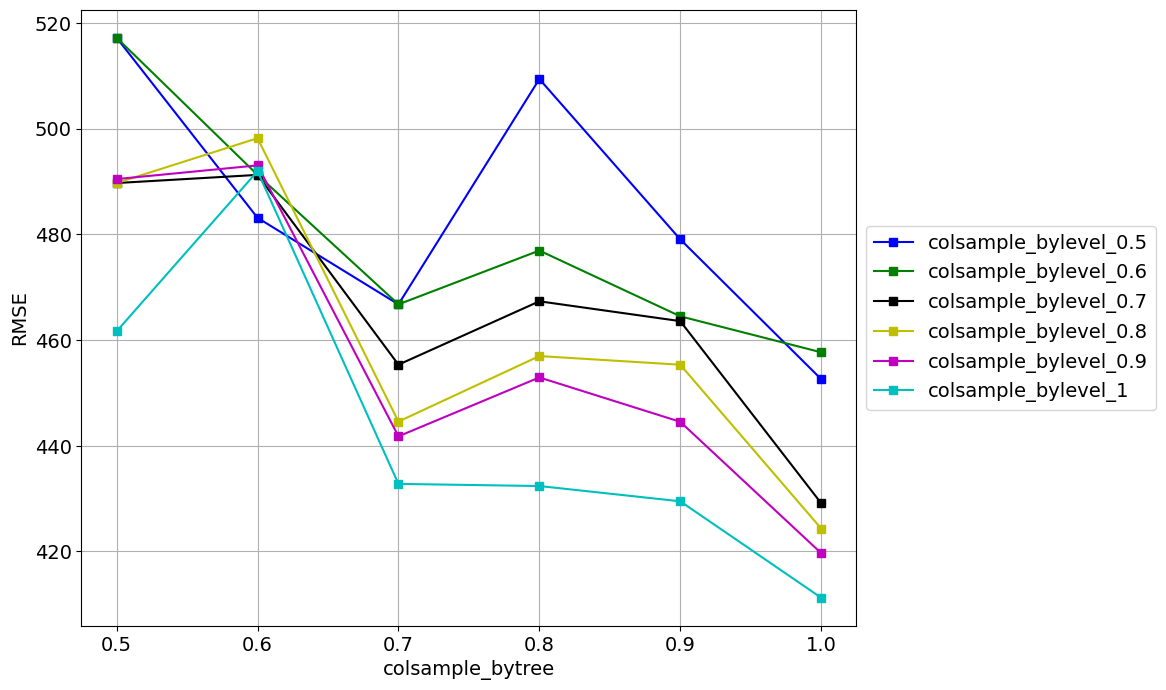

In [ ]:
# Plot performance versus params
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
temp = error_rate[error_rate[param2_label]==param2_list[0]]
ax = temp.plot(x=param_label, y='rmse', style='bs-', grid=True)
legend_list = [param2_label + '_' + str(param2_list[0])]

color_list = ['r', 'g', 'k', 'y', 'm', 'c', '0.75']
for i in range(1,len(param2_list)):
    temp = error_rate[error_rate[param2_label]==param2_list[i]]
    ax = temp.plot(x=param_label, y='rmse', color=color_list[i%len(color_list)], marker='s', grid=True, ax=ax)
    legend_list.append(param2_label + '_' + str(param2_list[i]))

ax.set_xlabel(param_label)
ax.set_ylabel("RMSE")
plt.rcParams.update({'font.size': 14})
plt.legend(legend_list, loc='center left', bbox_to_anchor=(1.0, 0.5)) # positions legend outside figure

In [ ]:
# Get optimum value for param and param2
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
colsample_bytree_opt = temp['colsample_bytree'].values[0]
colsample_bylevel_opt = temp['colsample_bylevel'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = ")
colsample_bytree_opt, colsample_bylevel_opt

min RMSE = 411.254
optimum params = 


(1.0, 1.0)

In [ ]:
# Get optimum value for param and param2, using MAPE
# We will use RMSE to decide the final optimum params to use
temp = error_rate[error_rate['mape_pct'] == error_rate['mape_pct'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape_pct'].min())
print("optimum params = ")
temp['colsample_bytree'].values[0], temp['colsample_bylevel'].values[0]

min MAPE = 0.617%
optimum params = 


(1.0, 1.0)

# Tuned params

In [ ]:
d = {'param': ['n_estimators', 'max_depth', 'learning_rate', 'min_child_weight', 'subsample', 'colsample_bytree', 'colsample_bylevel', 'gamma', 'rmse', 'mape_pct'],
     'original': [n_estimators, max_depth, learning_rate, min_child_weight, subsample, colsample_bytree, colsample_bylevel, gamma, rmse_bef_tuning, mape_bef_tuning],
     'after_tuning': [n_estimators_opt, max_depth_opt, learning_rate_opt, min_child_weight_opt, subsample_opt, colsample_bytree_opt, colsample_bylevel_opt, gamma_opt, error_rate['rmse'].min(), error_rate['mape_pct'].min()]}
tuned_params = pd.DataFrame(d)
tuned_params = tuned_params.round(3)
tuned_params

,param,original,after_tuning
0,n_estimators,100.000,240.000
1,max_depth,3.000,7.000
2,learning_rate,0.100,0.200
3,min_child_weight,1.000,5.000
4,subsample,1.000,0.700
5,colsample_bytree,1.000,1.000
6,colsample_bylevel,1.000,1.000
7,gamma,0.000,0.700
8,rmse,411.538,411.254
9,mape_pct,0.617,0.617


In [ ]:
rmse, mape, est = train_pred_eval_model(X_train_cv_scaled,
                             y_train_cv_scaled,
                             X_sample_scaled,
                             y_sample,
                             test['close_mean'],
                             test['close_std'],
                             seed=model_seed,
                             n_estimators=n_estimators_opt,
                             max_depth=max_depth_opt,
                             learning_rate=learning_rate_opt,
                             min_child_weight=min_child_weight_opt,
                             subsample=subsample_opt,
                             colsample_bytree=colsample_bytree_opt,
                             colsample_bylevel=colsample_bylevel_opt,
                             gamma=gamma_opt)

# Calculate RMSE
print("RMSE on test set = %0.3f" % rmse)

# Calculate MAPE
print("MAPE on test set = %0.3f%%" % mape)

RMSE on test set = 195.914
MAPE on test set = 0.419%


Text(0, 0.5, 'USD')

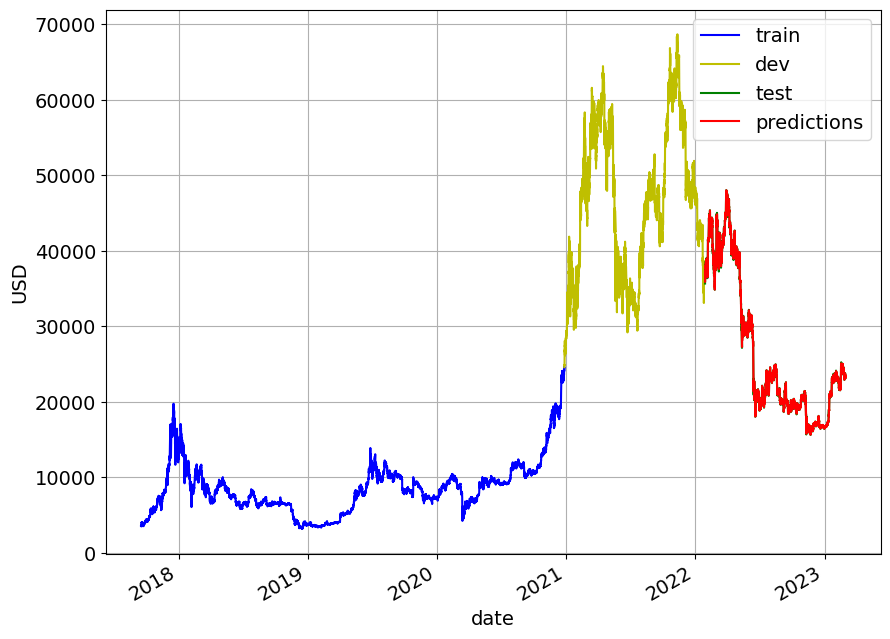

In [ ]:
# Plot close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'est': est,
                       'y_sample': y_sample,
                       'date': test['date']})

ax = train.plot(x='date', y='close', style='b-', grid=True)
ax = cv.plot(x='date', y='close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='close', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")

Text(0.5, 1.0, 'Zoom in to test set')

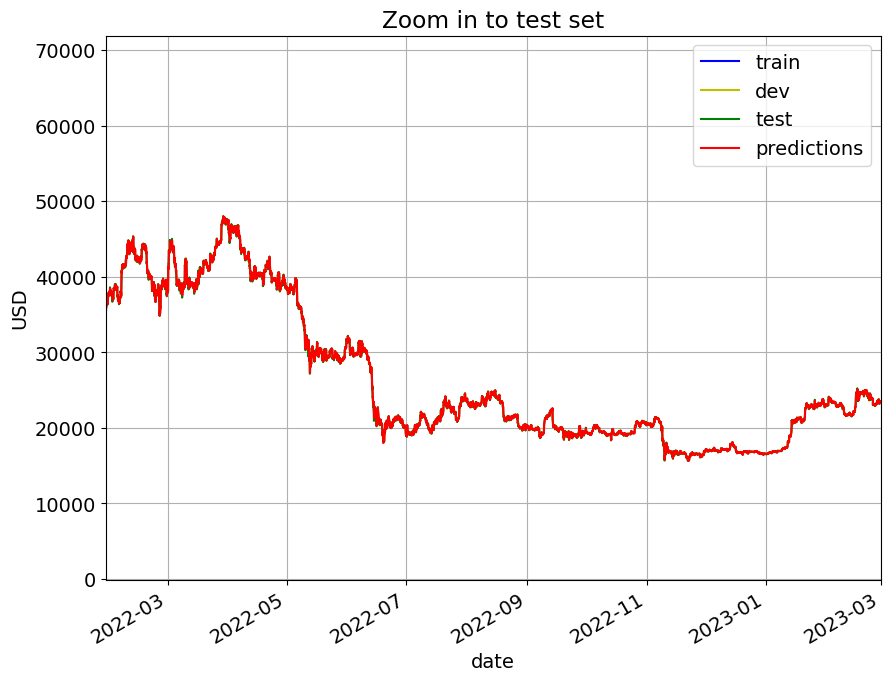

In [ ]:
# Plot close over time, for test set only
rcParams['figure.figsize'] = 10, 8 # width 10, height 8
ax = train.plot(x='date', y='close', style='b-', grid=True)
ax = cv.plot(x='date', y='close', style='y-', grid=True, ax=ax)
ax = test.plot(x='date', y='close', style='g-', grid=True, ax=ax)
ax = est_df.plot(x='date', y='est', style='r-', grid=True, ax=ax)
ax.legend(['train', 'dev', 'test', 'predictions'])
ax.set_xlabel("date")
ax.set_ylabel("USD")
ax.set_xlim([date(2022, 1, 28), date(2023, 3, 1)])
# ax.set_ylim([19000, 30000])
ax.set_title("Zoom in to test set")

In [ ]:
est_df

,est,y_sample,date
38131,36231.123533,35659.02,2022-01-28 04:00:00
38132,35867.362578,36156.36,2022-01-28 05:00:00
38133,36148.761097,36786.85,2022-01-28 06:00:00
38134,36645.388920,37283.03,2022-01-28 07:00:00
38135,37147.436100,37120.00,2022-01-28 08:00:00
...,...,...,...
47657,23528.859527,23473.37,2023-03-01 02:00:00
47658,23474.802361,23189.26,2023-03-01 03:00:00
47659,23315.767882,23209.65,2023-03-01 04:00:00
47660,23254.018644,23164.41,2023-03-01 05:00:00


In [ ]:
est_df['error'] = abs(est_df['est']-est_df['y_sample'])
est_df

,est,y_sample,date,error
38131,36231.123533,35659.02,2022-01-28 04:00:00,572.103533
38132,35867.362578,36156.36,2022-01-28 05:00:00,288.997422
38133,36148.761097,36786.85,2022-01-28 06:00:00,638.088903
38134,36645.388920,37283.03,2022-01-28 07:00:00,637.641080
38135,37147.436100,37120.00,2022-01-28 08:00:00,27.436100
...,...,...,...,...
47657,23528.859527,23473.37,2023-03-01 02:00:00,55.489527
47658,23474.802361,23189.26,2023-03-01 03:00:00,285.542361
47659,23315.767882,23209.65,2023-03-01 04:00:00,106.117882
47660,23254.018644,23164.41,2023-03-01 05:00:00,89.608644


In [ ]:
est_df.describe()

,est,y_sample,error
count,9531.000000,9531.000000,9531.000000
mean,26347.839430,26334.654260,113.986177
std,9288.567357,9283.721962,159.349528
min,15655.941022,15622.990000,0.002037
25%,19428.024703,19420.470000,23.182882
50%,22448.580142,22418.740000,59.911234
75%,35857.191213,35821.115000,136.993932
max,48011.660089,48035.610000,2263.979952


In [ ]:
est_df.sort_values(by=['error'])

,est,y_sample,date,error
47625,23391.252037,23391.25,2023-02-27 18:00:00,0.002037
47356,24665.625705,24665.63,2023-02-16 13:00:00,0.004295
43954,20220.968753,20220.96,2022-09-27 19:00:00,0.008753
46088,16829.893677,16829.91,2022-12-25 17:00:00,0.016323
43538,21295.838532,21295.82,2022-09-10 11:00:00,0.018532
...,...,...,...,...
38318,38054.898576,39703.35,2022-02-04 23:00:00,1648.451424
38894,39420.179524,41225.71,2022-02-28 23:00:00,1805.530476
39098,39342.576849,41515.24,2022-03-09 11:00:00,2172.663151
40619,31624.384161,29421.58,2022-05-11 20:00:00,2202.804161


In [ ]:
fig = px.line(est_df, x='date', y=['est', 'y_sample'])
fig.show()